In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [5]:
import seaborn as sns

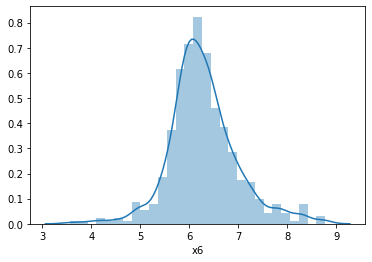

In [6]:
sns.distplot(df['x6'])

# 外れ値除去

In [7]:
col = 'x6'

In [9]:
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [10]:
mean[col]

6.284634387351788

In [12]:
# 標準偏差
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [13]:
sigma[col]

0.7026171434153234

In [14]:
low = mean[col] - 3 * sigma[col]
low

4.176782957105817

In [15]:
height = mean[col] + 3 * sigma[col]
height

8.392485817597759

In [19]:
df2=df[(df[col]>low) & (df[col]<height)]

In [20]:
len(df2)

498

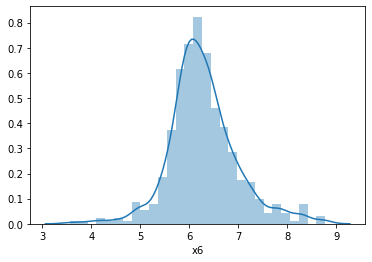

In [21]:
sns.distplot(df[col])

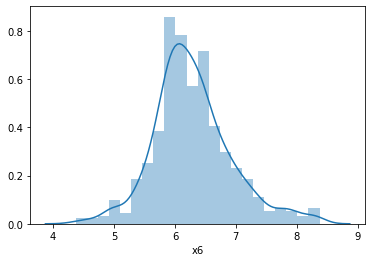

In [22]:
sns.distplot(df2[col])

In [23]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [25]:
_df = df
for col in cols:
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    _df = _df[(_df[col]>low) & (_df[col]<high)]

In [26]:
len(df)

506

In [27]:
len(_df)

415

- 外れ値は取り除く
- 外れ値を平均もしくは中央値などで埋める
- 主成分分析を使って、潜在変数に変換した後に3σ法を適用

In [28]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [29]:
X = _df.iloc[:, :-1]
y = _df.iloc[:, -1]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
model.score(X_test, y_test)

0.6253776004329581

In [36]:
model.score(X_train, y_train)

0.7972109224535133

# Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [42]:
X_train2

array([[-0.44982613, -0.47117023, -0.01455847, ...,  0.3716043 ,
         0.06655172, -0.73371428],
       [-0.45396528, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.38053452, -0.32783019],
       [-0.19959841, -0.47117023,  1.29482264, ..., -1.75496677,
        -0.18177662, -0.75722108],
       ...,
       [ 0.49446336, -0.47117023,  1.07385525, ...,  0.84417564,
         0.27992872, -0.12097034],
       [-0.45659855,  0.61013288, -0.5893723 , ...,  0.08806149,
         0.44754069, -0.88259069],
       [-0.47327932, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.44754069, -0.54095851]])

In [43]:
X_test2

array([[ 2.42729712, -0.47117023,  1.07385525, ...,  0.84417564,
         0.18530905,  0.13917159],
       [-0.45474875, -0.47117023, -0.35048863, ...,  1.17497559,
         0.42378923,  1.00892322],
       [-0.46182643, -0.47117023, -0.04740498, ...,  0.08806149,
         0.44754069, -0.2118633 ],
       ...,
       [ 0.81140192, -0.47117023,  1.07385525, ...,  0.84417564,
        -1.37031545,  1.86143653],
       [-0.38089512,  0.61013288, -1.03578616, ..., -2.55833806,
         0.28282524, -0.77759364],
       [ 2.34176675, -0.47117023,  1.07385525, ...,  0.84417564,
        -5.2734731 ,  0.46199832]])

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
model.score(X_train2, y_train)

0.7972109224535133

In [47]:
model.score(X_test2, y_test)

0.6253776004329596

In [48]:
model.coef_

array([-1.95426423e-01,  2.11543329e-01,  5.08277354e-01,  4.44089210e-16,
       -1.21336016e+00,  3.91986658e+00, -3.69861217e-01, -1.85711554e+00,
        1.16625182e+00, -1.52855186e+00, -1.87256630e+00,  2.44427080e-01,
       -2.76100147e+00])

In [49]:
np.set_printoptions(precision=3, suppress=True)

In [50]:
model.coef_

array([-0.195,  0.212,  0.508,  0.   , -1.213,  3.92 , -0.37 , -1.857,
        1.166, -1.529, -1.873,  0.244, -2.761])